In [9]:
from SymPT import *
import numpy as np
import sympy as sp

In [10]:
H_Dv = np.array([[0.994649, 0.000116406, 0.0000718376, 0.000126118, 0.0000778524,
  0.0000947516, 0.0000878573, 0.0000273828,
  0.0000851822], [0.000116406, 0.920502, 0.000159157, 0.000127701,
  0.0000860832, 0.000111994, 0.000161341, 0.0000766511,
  0.0000300605], [0.0000718376, 0.000159157, 0.678427, 0.000143383,
  0.000100207, 0.000120234, 0.0000502429, 0.0000482053,
  0.0000722342], [0.000126118, 0.000127701, 0.000143383, 0.651484,
  0.000147627, 0.000123086, 0.000112963, 0.000194782,
  0.000138022], [0.0000778524, 0.0000860832, 0.000100207, 0.000147627,
   0.60591, 0.000177963, 0.0000917733, 0.0000248701,
  0.000190735], [0.0000947516, 0.000111994, 0.000120234, 0.000123086,
  0.000177963, 0.583123, 0.0000623582, 0.000103015,
  0.000104973], [0.0000878573, 0.000161341, 0.0000502429, 0.000112963,
   0.0000917733, 0.0000623582, 0.532847, 0.0000902471,
  0.000107278], [0.0000273828, 0.0000766511, 0.0000482053,
  0.000194782, 0.0000248701, 0.000103015, 0.0000902471, 0.334344,
  0.0000904442], [0.0000851822, 0.0000300605, 0.0000722342,
  0.000138022, 0.000190735, 0.000104973, 0.000107278, 0.0000904442,
  0.159793]])

In [ ]:
diagonals = [RDSymbol(f'omega_{i}') for i in range(H_Dv.shape[0])]
perturbative_symbols = []
perturvative_values = []

substitutions = [diagonals[i]: H_Dv[i, i] for i in range(H_Dv.shape[0])]

H = sp_diag(*diagonals)
for i in range(H.shape[0]):
    for j in range(i+1, H.shape[1]):
        perturbative_symbols.append(RDSymbol(f'lambda_{i}_{j}', order=1, real=True, positive=True))
        perturvative_values.append(H_Dv[i, j])
        H[i, j] = perturbative_symbols[-1]
        H[j, i] = H[i, j]
substitutions.update(dict(zip(perturbative_symbols, perturvative_values)))

In [12]:
Eff_frame = EffectiveFrame(H, symbol_values=substitutions)

Creating the EffectiveFrame object with matrix form.
The EffectiveFrame object has been initialized successfully.

Effective Frame

╭────────┬────────┬─────────────╮
│  Name  │  Type  │  Dimension  │
├────────┼────────┼─────────────┤
│ Finite │ Finite │     9x9     │
╰────────┴────────┴─────────────╯

Effective Hamiltonian: 	Not computed yet. To do so, run `solve` method. 




In [13]:
result_DV = np.array([[0.994649 , 0.000116547 ,
  0.0000723715 , -1.30704e-11 , -1.21451e-11 , -9.66127e-12 , -4.46295e-12 , -1.89448e-12 , -1.78403e-12 ], [0.000116547 , 0.920502 ,
  0.000159747 , -9.64476e-12 , -1.85911e-11 , -1.51158e-11 , -7.09334e-12 , -3.90503e-12 , -3.9623e-12 ], [0.0000723715 , 0.000159747 ,
  0.678428 , -5.52601e-11 , -3.32693e-11 , -2.78211e-11 , -7.36109e-12 , -6.25971e-12 ,
  2.9529e-13 ], [-1.30704e-11 , -9.64476e-12 , -5.52601e-11 , 0.651483 , 0.000147382 ,
  0.000122797 , 1.93717e-13 , 3.03945e-12 ,
  2.88436e-12 ], [-1.21451e-11 , -1.85911e-11 , -3.32693e-11 , 0.000147382 , 0.60591 ,
  0.000177918 , 1.28778e-12 , 2.87774e-12 ,
  1.91615e-12 ], [-9.66127e-12 , -1.51158e-11 , -2.78211e-11 , 0.000122797 ,
  0.000177918 , 0.583123 , 1.00777e-12 ,
  3.264e-12 ,
  2.55332e-12 ], [-4.46295e-12 , -7.09334e-12 , -7.36109e-12 , 1.93717e-13 ,
  1.28779e-12 , 1.00777e-12 , 0.532847 ,
  0.0000899812 ,
  0.000106948 ], [-1.89448e-12 , -3.90503e-12 , -6.25971e-12 , 3.03945e-12 ,
  2.87774e-12 , 3.264e-12 , 0.0000899812 ,
  0.334344 ,
  0.0000903109 ], [-1.78403e-12 , -3.9623e-12 , 2.9529e-13 , 2.88436e-12 ,
  1.91615e-12 , 2.55332e-12 , 0.000106948 ,
  0.0000903109 , 0.159792 ]])

mask_matix = np.abs(result_DV) <= 1e-10
mask_matix

mask = Block(fin=mask_matix)
mask

In [ ]:
result = Eff_frame.solve(max_order=3, method='LA', mask=mask)

Substituting the symbol values in the Hamiltonian and perturbative interactions.


Rotating for each order: 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

The Hamiltonian has been solved successfully. Please use the get_H method to get the result in the desired form.


In [15]:
H_eff = Eff_frame.get_H(return_form='matrix')

Converting to matrix form: 100%|██████████| 1/1 [00:00<00:00, 8456.26it/s]


In [27]:
H_eff_ours = np.array(sp.N(H_eff), dtype=float)

In [83]:
Hh = sp.Matrix(H_Dv)
X = Hh.diagonalize()[0]
X_inv = X.inv()

X = np.array(X, dtype=float)
X_inv = np.array(X_inv, dtype=float)

In [87]:
B_mask = lambda x: np.logical_not(mask_matix)*1 * x


In [95]:
import scipy.linalg as la



In [97]:
T = X @ B_mask(X_inv) @ la.fractional_matrix_power(B_mask(X) @ B_mask(X_inv), -1/2)

In [101]:
exact_result = la.inv(T) @ np.array(Hh, dtype=float) @ T

In [36]:
sp.Matrix(result_DV)

Matrix([
[    0.994649,  0.000116547,   7.23715e-5, -1.30704e-11, -1.21451e-11, -9.66127e-12, -4.46295e-12, -1.89448e-12, -1.78403e-12],
[ 0.000116547,     0.920502,  0.000159747, -9.64476e-12, -1.85911e-11, -1.51158e-11, -7.09334e-12, -3.90503e-12,  -3.9623e-12],
[  7.23715e-5,  0.000159747,     0.678428, -5.52601e-11, -3.32693e-11, -2.78211e-11, -7.36109e-12, -6.25971e-12,   2.9529e-13],
[-1.30704e-11, -9.64476e-12, -5.52601e-11,     0.651483,  0.000147382,  0.000122797,  1.93717e-13,  3.03945e-12,  2.88436e-12],
[-1.21451e-11, -1.85911e-11, -3.32693e-11,  0.000147382,      0.60591,  0.000177918,  1.28778e-12,  2.87774e-12,  1.91615e-12],
[-9.66127e-12, -1.51158e-11, -2.78211e-11,  0.000122797,  0.000177918,     0.583123,  1.00777e-12,    3.264e-12,  2.55332e-12],
[-4.46295e-12, -7.09334e-12, -7.36109e-12,  1.93717e-13,  1.28779e-12,  1.00777e-12,     0.532847,   8.99812e-5,  0.000106948],
[-1.89448e-12, -3.90503e-12, -6.25971e-12,  3.03945e-12,  2.87774e-12,    3.264e-12,   8.99812e

In [39]:
(H_eff).evalf()

Matrix([
[    0.994649110190929,  0.000116547290578572,   7.23715327132125e-5, -2.68960210377137e-20, -1.33270338500708e-20, -2.72228574823126e-20, -6.28280858463611e-25,  3.42950045955738e-21,  2.30795181647231e-23],
[ 0.000116547290578572,     0.920502199364062,  0.000159747270270596, -2.74088817337772e-20, -5.43921542718184e-20, -4.82384157683126e-22, -2.70695350114355e-20, -7.99560738910918e-24, -3.35556594766332e-21],
[  7.23715327132125e-5,  0.000159747270270596,     0.678428092285407,  4.62375325847189e-19,  5.62899172754066e-20,  1.48144570356624e-20, -2.04594686156742e-20,  6.66977046147115e-21,  1.37607576473839e-20],
[-2.68952900477209e-20, -2.74096799232796e-20,  4.60681239343511e-19,     0.651483393553645,  0.000147381603212546,   0.00012279736404581, -1.03838701845608e-22,  -2.7104886789927e-20,  2.71311084663185e-20],
[-1.33274383599431e-20, -5.43778015382203e-20,  5.62913681731442e-20,  0.000147381603212546,     0.605910019390115,  0.000177918662579253, -6.7551482191487

In [35]:
result_exact = np.array([[0.994649, 0.000116547, 0.0000723715, 0, 0, 0, 0, 0,
  0], [0.000116547, 0.920502, 0.000159747, 0, 0, 0, 0, 0,
  0], [0.0000723715, 0.000159747, 0.678428, 0, 0, 0, 0, 0, 0], [0, 0,
  0, 0.651483, 0.000147382, 0.000122797, 0, 0, 0], [0, 0, 0,
  0.000147382, 0.60591, 0.000177918, 0, 0, 0], [0, 0, 0, 0.000122797,
  0.000177918, 0.583123, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.532847,
  0.0000899812, 0.000106948], [0, 0, 0, 0, 0, 0, 0.0000899812,
  0.334344, 0.0000903109], [0, 0, 0, 0, 0, 0, 0.000106948,
  0.0000903109, 0.159792]], dtype=float)
sp.Matrix(result_exact)

Matrix([
[   0.994649, 0.000116547,  7.23715e-5,         0.0,         0.0,         0.0,         0.0,        0.0,         0.0],
[0.000116547,    0.920502, 0.000159747,         0.0,         0.0,         0.0,         0.0,        0.0,         0.0],
[ 7.23715e-5, 0.000159747,    0.678428,         0.0,         0.0,         0.0,         0.0,        0.0,         0.0],
[        0.0,         0.0,         0.0,    0.651483, 0.000147382, 0.000122797,         0.0,        0.0,         0.0],
[        0.0,         0.0,         0.0, 0.000147382,     0.60591, 0.000177918,         0.0,        0.0,         0.0],
[        0.0,         0.0,         0.0, 0.000122797, 0.000177918,    0.583123,         0.0,        0.0,         0.0],
[        0.0,         0.0,         0.0,         0.0,         0.0,         0.0,    0.532847, 8.99812e-5, 0.000106948],
[        0.0,         0.0,         0.0,         0.0,         0.0,         0.0,  8.99812e-5,   0.334344,  9.03109e-5],
[        0.0,         0.0,         0.0,        

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Error DV Ours')

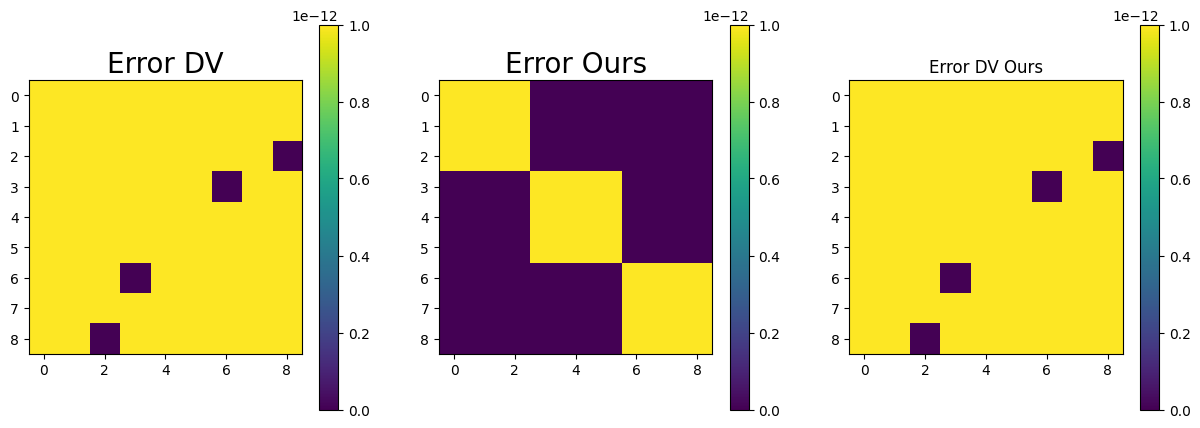

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

vmax = 1e-12

error_DV = np.round(np.abs(result_DV - exact_result), int(np.abs(np.log10(vmax))))
error_ours = np.round(np.abs(H_eff_ours - exact_result), int(np.abs(np.log10(vmax))))
error_DV_ours = np.round(np.abs(result_DV - H_eff_ours), int(np.abs(np.log10(vmax))))

im = ax[0].imshow(error_DV, cmap='viridis', vmax=vmax)
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Error DV', fontsize=20)
im = ax[1].imshow(error_ours, cmap='viridis', vmax=vmax)
fig.colorbar(im, ax=ax[1])
ax[1].set_title('Error Ours', fontsize=20)
im = ax[2].imshow(error_DV_ours, cmap='viridis', vmax=vmax)
fig.colorbar(im, ax=ax[2])
ax[2].set_title('Error DV Ours')